In [30]:
import torch
import torch.nn as nn
import torch.functional as F
import torch.autograd as autograd
import matplotlib.pyplot as plt

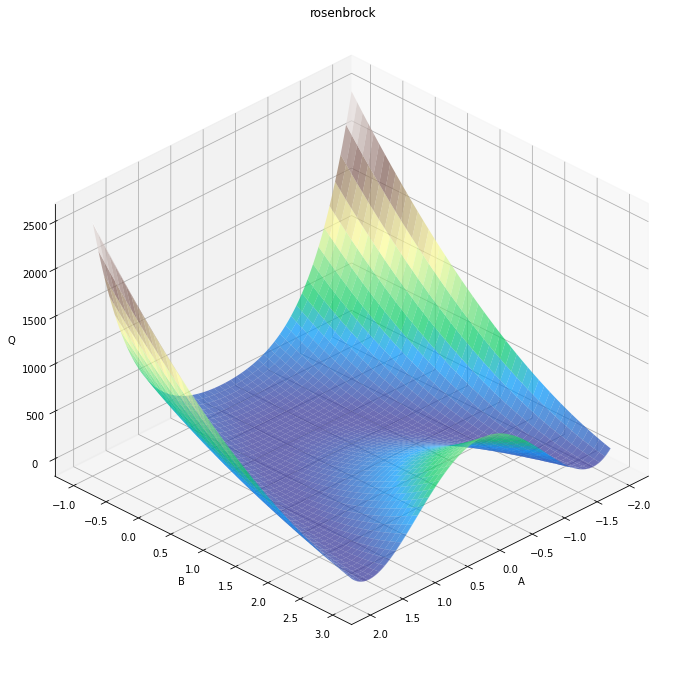

In [31]:
def rosenbrock(x, y):
    # https://en.wikipedia.org/wiki/Test_functions_for_optimization
    return (1 - x) ** 2 + 100 * (y - x ** 2) ** 2

A, B = torch.meshgrid(torch.linspace(-2, 2, 801), torch.linspace(-1, 3, 801), indexing='ij')
Q = rosenbrock(A, B)


fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d', proj_type='ortho')
ax.plot_surface(A, B, Q, cmap='terrain', alpha=.7)
ax.set_xlabel('A')
ax.set_ylabel('B')
ax.set_zlabel('Q')
ax.view_init(30, 45)
ax.set_title('rosenbrock')
plt.show()

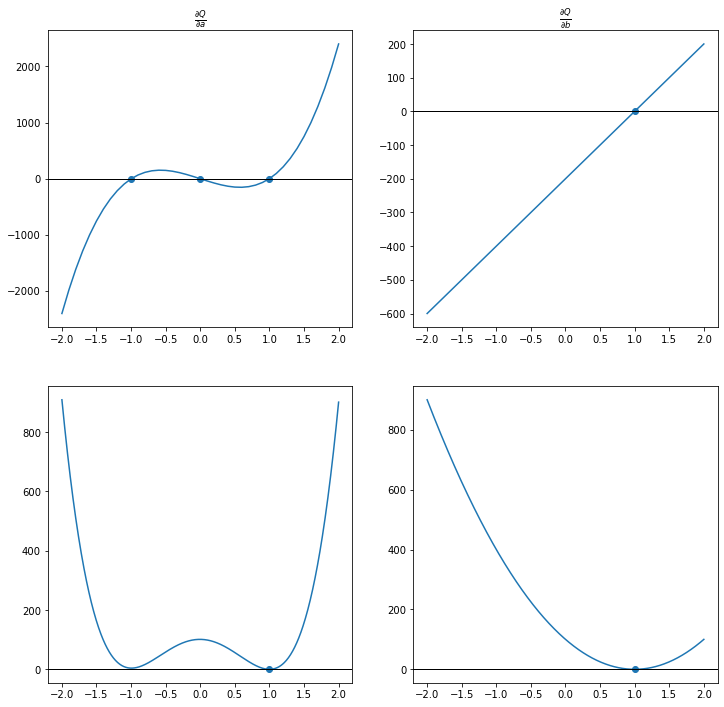

In [32]:
plt.figure(figsize=(12,12))
plt.subplot(221)
plt.title(r'$\frac{\partial{Q}}{\partial{a}}$')
A = torch.linspace(-2, 2, 41)
B = torch.linspace( 1, 1, 41)
AJ, BJ = autograd.functional.jacobian(rosenbrock, (A, B))
plt.plot(A, AJ.diag())
plt.scatter([-1,0,1], [0,0,0])
plt.axhline(0, linewidth=1, c='k')

plt.subplot(222)
plt.title(r'$\frac{\partial{Q}}{\partial{b}}$')
A = torch.linspace( 1, 1, 41)
B = torch.linspace(-2, 2, 41)
AJ, BJ = autograd.functional.jacobian(rosenbrock, (A, B))
plt.plot(B, BJ.diag())
plt.scatter(1, 0)
plt.axhline(0, linewidth=1, c='k')

l = torch.linspace(-2, 2, 801)
A, B = torch.meshgrid(l, l, indexing='ij')
Q = rosenbrock(A, B)

plt.subplot(223)
plt.plot(l, Q[:,(l==1).nonzero()].squeeze())
plt.scatter(1, 0)
plt.axhline(0, linewidth=1, c='k')

plt.subplot(224)
plt.plot(l, Q[(l==1).nonzero(),:].squeeze())
plt.scatter(1, 0)
plt.axhline(0, linewidth=1, c='k')
plt.show()